# HW3 Starter Code


Remember, the authoritative instructions are on the course website:

http://www.cs.tufts.edu/comp/135/2019s/hw3.html


Please report any questions to Piazza.

# Import required libraries

In [2]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns

# Starter code students need to edit

In [3]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
            
    return TP, TN, FP, FN

# Starter code that should be used as is.

No need to edit these functions!

In [4]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

In [5]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    
    #print(ytrue_N, yproba1_N >= thresh)
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [6]:
def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    ''' Compute common binary classifier performance metrics across many thresholds
    
    If no array of thresholds is provided, will use all 'unique' values
    in the yproba1_N array to define all possible thresholds with different performance.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset

    Returns
    -------
    thresh_grid : 1D array of floats
        One entry for each possible threshold
    perf_dict : dict, with key, value pairs:
        * 'acc' : 1D array of accuracy values (one per threshold)
        * 'ppv' : 1D array of positive predictive values (one per threshold)
        * 'npv' : 1D array of negative predictive values (one per threshold)
        * 'tpr' : 1D array of true positive rates (one per threshold)
        * 'tnr' : 1D array of true negative rates (one per threshold)
    '''
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)

def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases
    
    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')
    
    axes[2].legend()
    axes[2].set_ylim([0, 1])

# Problem 1: Binary Classifier for Cancer-Risk Screening

### Load the dataset

In [7]:
# Load 3 feature version of x arrays
x_tr_M3 = np.loadtxt('data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt('data_cancer/x_valid.csv', delimiter=',', skiprows=1)
x_te_N3 = np.loadtxt('data_cancer/x_test.csv', delimiter=',', skiprows=1)

# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, :2].copy()
x_va_N2 = x_va_N3[:, :2].copy()
x_te_N2 = x_te_N3[:, :2].copy()

In [8]:
y_tr_M = np.loadtxt('data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('data_cancer/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('data_cancer/y_test.csv', delimiter=',', skiprows=1)

## Problem 1a: Data Exploration

### **1a(i):** What fraction of the provided patients have cancer in the training set, the validation set, and the test set? 

In [9]:
print("frac has_cancer on TRAIN: %.3f" % (np.sum(y_tr_M)/y_tr_M.size)) # TODO edit the printed values
print("frac has_cancer on VALID: %.3f" % (np.sum(y_va_N)/y_va_N.size))
print("frac has_cancer on TEST : %.3f" % (np.sum(y_te_N)/y_te_N.size))

frac has_cancer on TRAIN: 0.141
frac has_cancer on VALID: 0.139
frac has_cancer on TEST : 0.139


### **1a(ii):** Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve a decision tree's performance?

**Answer**:  
I don't see any data category need preprocessing.

### 1a(iii): Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve logistic regression's performance?

**Answer**:   
I think we would like to regularize all data category to improve the speed of convergence.

## Problem 1b: The predict-0-always baseline

### Problem 1b(i): Compute the accuracy of the predict-0-always classifier on validation and test set

In [10]:
zeros_va=np.zeros(y_va_N.size)
zeros_te=np.zeros(y_te_N.size)
tpva,tnva,fpva,fnva=calc_TP_TN_FP_FN(y_va_N, zeros_va)
tpte,tnte,fpte,fnte=calc_TP_TN_FP_FN(y_te_N, zeros_te)

In [11]:
print("acc on VALID: %.3f" % ((tpva+tnva)/y_va_N.size)) # TODO edit values!
print("acc on TEST : %.3f" % ((tpte+tnte)/y_te_N.size))

acc on VALID: 0.861
acc on TEST : 0.861


### Problem 1b(ii): Print a confusion matrix for predict-0-always on the validation set.

In [12]:
# TODO call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_va_N, zeros_va, 0.5))

Predicted    0  1
True             
0          155  0
1           25  0


### Problem 1b(iii): This classifier gets pretty good accuracy! Why wouldn't we want to use it?

**Answer**:   
Because we did nothing other than sent everybody home. In this case, we missed all sick people with cancer.  
This shows accuracy may not be a good metric here.

### Problem 1b(iv): For the intended application (screening patients before biopsy), describe the possible mistakes the classifier can make in task-specific terms. What costs does each mistake entail (lost time? lost money? life-threatening harm?). How do you recommend evaluating the classifier to be mindful of these costs?


**Answer**:   
We might have false positive, where patients get biopsy when they're not sick. This will cause great loss money and time.
We might have false negative, where we send patients with cancer home. This will cost the life of a patient.

I will recomend to use TPR to make sure we send home healthy people. Then, I'll recomend to achieve higher PPV to increase the probability that we do biopsy on patients with cancer (i.e. decrease the probability we do biopsy on patients without cancer). 

## 1c : Logistic Regression

### Model Fitting for 1c(i)

In [13]:
##Cost Function
##I didn't use it here.
def cost_fun(y_tr, p):
    costs=-np.dot(y_tr, np.log(p))-np.dot((1-y_tr),np.log(1-p))
    return costs/y_tr.size;

In [14]:
C_grid = np.logspace(-9, 6, 31)

tr_loss_list = list()
va_loss_list = list()
lr_list=list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C,solver='liblinear')
    
    # TODO fit, predict_proba, and evaluate logistic loss
    lr.fit(x_tr_M2,y_tr_M)
    p_tr=lr.predict_proba(x_tr_M2)[:,1];
    p_va=lr.predict_proba(x_va_N2)[:,1];
    #cost_tr =cost_fun(y_tr_M, p_tr)
    #valid_tr=cost_fun(y_va_N, p_va)
    
    cost_tr =sklearn.metrics.log_loss(y_tr_M, p_tr)
    valid_tr=sklearn.metrics.log_loss(y_va_N, p_va)
    #print(cost_tr)
    tr_loss_list.append(cost_tr)
    va_loss_list.append(valid_tr)
    lr_list.append(lr)
# Record the best model here
id_min_cost=np.argmin(va_loss_list)
lr_Best2=lr_list[id_min_cost]
p_va_Best2=lr_Best2.predict_proba(x_va_N2)[:,1];
p_tr_Best2=lr_Best2.predict_proba(x_tr_M2)[:,1];
p_te_Best2=lr_Best2.predict_proba(x_te_N2)[:,1];

### **1c(i):** Apply your logistic regression code to the "2 feature" $x$ data, and make a plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 2 feature data: 31.623


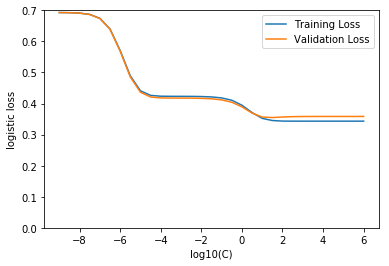

In [15]:
# TODO make plot
plt.plot(np.log10(C_grid), tr_loss_list, label='Training Loss')
plt.plot(np.log10(C_grid), va_loss_list, label='Validation Loss')

plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);

# TODO add legend
plt.legend();

#print(va_loss_list)
print("best C for LR with 2 feature data: %.3f" % C_grid[id_min_cost]) 


### **1c(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(i) classifier are on the validation set. 

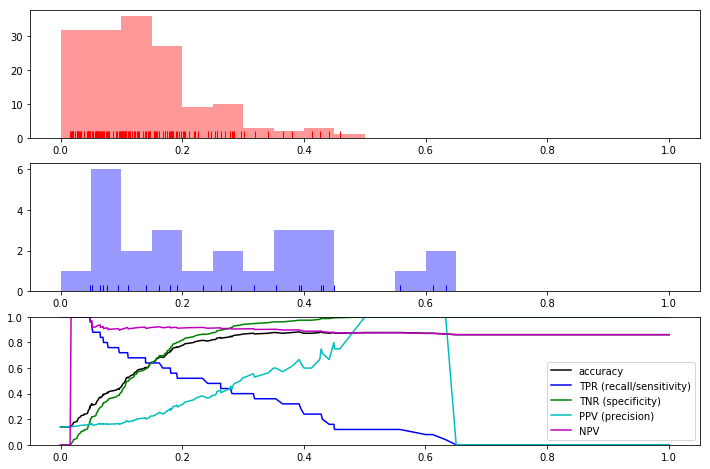

In [16]:
# TODO call make_plot_perf_vs_threshold(...)
make_plot_perf_vs_threshold(y_va_N, p_va_Best2)

### Model fitting for 1c(iii)

In [17]:
# TODO like 1c(i) but with 3 features
tr_loss_list = list()
va_loss_list = list()
lr_list=list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C,solver='liblinear')
    
    # TODO fit, predict_proba, and evaluate logistic loss
    lr.fit(x_tr_M3,y_tr_M)
    p_tr=lr.predict_proba(x_tr_M3)[:,1];
    p_va=lr.predict_proba(x_va_N3)[:,1];
    #cost_tr =cost_fun(y_tr_M, p_tr)
    #valid_tr=cost_fun(y_va_N, p_va)
    #print(cost_tr)
    cost_tr =sklearn.metrics.log_loss (y_tr_M, p_tr)
    valid_tr=sklearn.metrics.log_loss (y_va_N, p_va)                         
    tr_loss_list.append(cost_tr)
    va_loss_list.append(valid_tr)
    lr_list.append(lr)
# Record the best model here
#print(va_loss_list)
id_min_cost=np.argmin(va_loss_list)
lr_Best3=lr_list[id_min_cost]
p_va_Best3=lr_Best3.predict_proba(x_va_N3)[:,1];
p_tr_Best3=lr_Best3.predict_proba(x_tr_M3)[:,1];
p_te_Best3=lr_Best3.predict_proba(x_te_N3)[:,1];

### **1c(iii):** Plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 3 feature data: 1000000.000


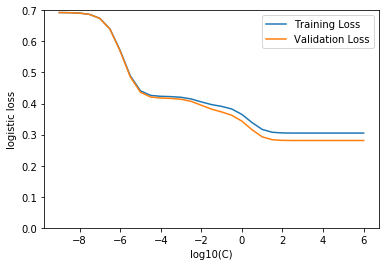

In [18]:
# TODO make plot
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
plt.plot(np.log10(C_grid), tr_loss_list, label='Training Loss')
plt.plot(np.log10(C_grid), va_loss_list, label='Validation Loss')

plt.legend()
print("best C for LR with 3 feature data: %.3f" % C_grid[id_min_cost])

### Problem 1c(iv):  Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set.  

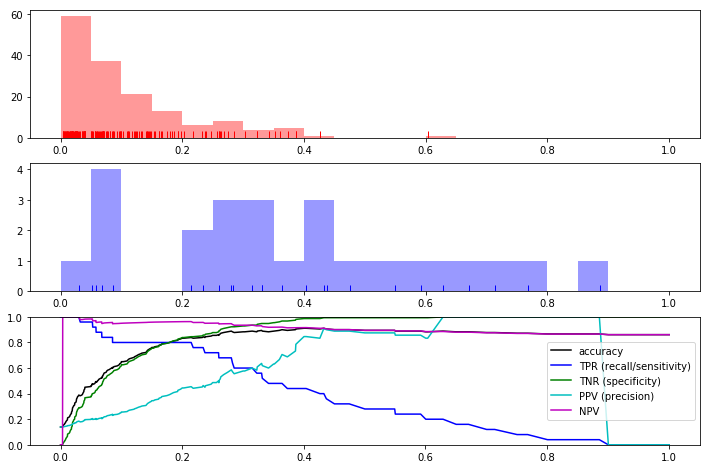

In [20]:
# TODO call make_plot_perf_vs_threshold(...)
make_plot_perf_vs_threshold(y_va_N, p_va_Best3)

## Problem 1d: Decision Tree

### Model fitting code for decision tree 1d(i)

In [21]:
##Cost Function
def cost_fun2(y_tr, p):
    costs=0.0
    for i in range(0,y_tr.size):
        if (y_tr[i]==0):
            if (p[i]==1):
                return float("inf")
            costs=costs-np.log(1-p[i])
        else:
            if (p[i]==0):
                return float("inf")
            costs=costs-np.log(p[i])
    return costs/y_tr.size;

In [22]:
min_samples_leaf_grid = np.asarray([1, 2, 5, 10, 20, 50, 100, 200, y_tr_M.size])

tr_loss_list = list()
va_loss_list = list()
tr_list=list()
for min_samples_leaf in min_samples_leaf_grid:
    tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=min_samples_leaf)

    # TODO fit, predict_proba, and compute logistic loss
    tree.fit(x_tr_M3, y_tr_M)
    tr_list.append(tree)
    p_tr=tree.predict_proba(x_tr_M3)[:,1];
    p_va=tree.predict_proba(x_va_N3)[:,1];
    cost_tr =sklearn.metrics. log_loss(y_tr_M, p_tr)
    valid_tr=sklearn.metrics. log_loss(y_va_N, p_va)
    #print(cost_tr)
    tr_loss_list.append(cost_tr)
    va_loss_list.append(valid_tr)
# TODO compute best value for min_samples_leaf
#print(tr_loss_list)
#print(va_loss_list)
id_min_cost=np.argmin(va_loss_list)
tr_Best=tr_list[id_min_cost]
p_va_BestT=tr_Best.predict_proba(x_va_N3)[:,1];
p_tr_BestT=tr_Best.predict_proba(x_tr_M3)[:,1];
p_te_BestT=tr_Best.predict_proba(x_te_N3)[:,1];

### **1d(i):** Plot of logistic loss (y-axis) vs. min_samples_leaf (x-axis) on the training set and validation set. Which value of min_samples_leaf do you prefer? 

best min_samples_leaf with 3 feature data: 100.000


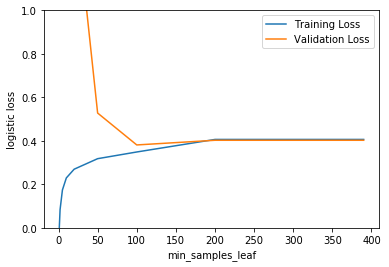

In [23]:
# TODO plot
plt.plot(min_samples_leaf_grid, tr_loss_list, label='Training Loss')
plt.plot(min_samples_leaf_grid, va_loss_list, label='Validation Loss')

# TODO add legend
plt.legend();

plt.xlabel('min_samples_leaf');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1.0]);

print("best min_samples_leaf with 3 feature data: %.3f" % min_samples_leaf_grid[id_min_cost]) # TODO

###  **1d(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set. 

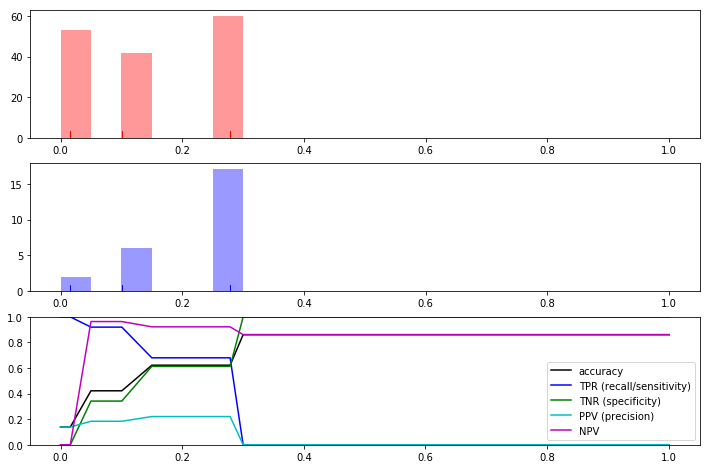

In [24]:
# TODO call make_plot_perf_vs_threshold
make_plot_perf_vs_threshold(y_va_N, p_va_BestT)

# Problem 1e: ROC Curve analysis

### Problem 1e(i): ROC on Validation set

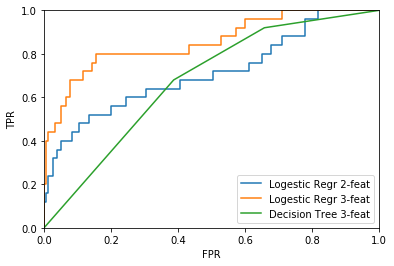

In [25]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
fpr2va, tpr2va, thr2va = sklearn.metrics.roc_curve(y_va_N, p_va_Best2)
plt.plot(fpr2va,tpr2va, label="Logestic Regr 2-feat")

fpr3va, tpr3va, thr3va = sklearn.metrics.roc_curve(y_va_N, p_va_Best3)
plt.plot(fpr3va,tpr3va, label="Logestic Regr 3-feat")

fprTva, tprTva, thrTva = sklearn.metrics.roc_curve(y_va_N, p_va_BestT)
plt.plot(fprTva,tprTva, label="Decision Tree 3-feat")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

### Problem 1e(ii): ROC on Test set

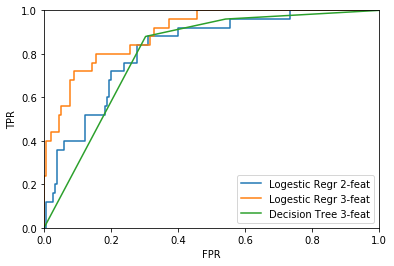

In [26]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)

fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_te_N, p_te_Best2)
plt.plot(fpr2te,tpr2te, label="Logestic Regr 2-feat")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_te_N, p_te_Best3)
plt.plot(fpr3te,tpr3te, label="Logestic Regr 3-feat")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_te_N, p_te_BestT)
plt.plot(fprTte,tprTte, label="Decision Tree 3-feat")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

### **1e(iii):** Short Answer: Compare the 3-feature LR to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: 
Yes, 3-featere LR.

### **1e(iv):** Short Answer: Compare the 3-feature DTree to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: 
No.


## Problem 1f: Selecting a decision threshold

### Problem 1f(i): Use default 0.5 threshold. Report perf. for 3-feature Logistic Regr.

In [27]:
best_thr = 0.5

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % best_thr)
print("")
print("ON THE TEST SET:")
print(calc_confusion_matrix_for_threshold(y_te_N, p_te_Best3, best_thr))
print("")
print(print_perf_metrics_for_threshold(y_te_N, p_te_Best3, best_thr))

ON THE VALIDATION SET:
Chosen best thr = 0.5000

ON THE TEST SET:
Predicted    0   1
True              
0          152   3
1           15  10

0.900 ACC
0.400 TPR
0.981 TNR
0.769 PPV
0.910 NPV
None


### Problem 1f(ii): Pick threshold to maximize TPR s.t. PPV >= 0.98. Report perf. for 3-feature Logistic Regr.

In [28]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)
thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(y_va_N, p_va_Best3,)
ppv_val=perf_grid['ppv']
ppv_pos=np.where(ppv_val>=0.96)
tpr_sel=perf_grid['tpr'][ppv_pos]

# TODO Find threshold that makes TPR as large as possible, while satisfying PPV >= 0.98
tpr_max=np.argmax(tpr_sel)

#print(tpr_max, perf_grid['tpr'],perf_grid['ppv'])
thr_best=thresh_grid[ppv_pos][tpr_max]

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % thr_best) # TODO
print("")
print("ON THE TEST SET:")
print(calc_confusion_matrix_for_threshold(y_te_N, p_te_Best3, thr_best))
print("")
print(print_perf_metrics_for_threshold(y_te_N, p_te_Best3, thr_best))

ON THE VALIDATION SET:
Chosen best thr = 0.6290

ON THE TEST SET:
Predicted    0  1
True             
0          155  0
1           20  5

0.889 ACC
0.200 TPR
1.000 TNR
1.000 PPV
0.886 NPV
None


### Problem 1f(iii): Pick threshold to maximize PPV s.t. TPR >= 0.98. Report perf. for 3-feature Logistic Regr.

In [29]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)
TPR_val=perf_grid['tpr']
TPR_pos=np.where(TPR_val>=0.96)
PPV_sel=perf_grid['ppv'][TPR_pos]

# TODO Find threshold that makes PPV as large as possible, while satisfying TPR >= 0.98
ppv_max=np.argmax(PPV_sel)

#print(tpr_max, perf_grid['tpr'],perf_grid['ppv'])
thr_best=thresh_grid[TPR_pos][ppv_max]

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % thr_best) # TODO
print("")
print("ON THE TEST SET:")

print(calc_confusion_matrix_for_threshold(y_te_N, p_te_Best3, thr_best))
print("")
print(print_perf_metrics_for_threshold(y_te_N, p_te_Best3, thr_best))

ON THE VALIDATION SET:
Chosen best thr = 0.0300

ON THE TEST SET:
Predicted   0   1
True             
0          57  98
1           0  25

0.456 ACC
1.000 TPR
0.368 TNR
0.203 PPV
1.000 NPV
None


### Problem 1f(iv): Compare the confusion matrices between 1f(i) - 1f(iii). Which thresholding strategy best meets our preferences from 1a: avoid life-threatening mistakes at all costs, while also eliminating unnecessary biopsies?

**Answer**:  
The 3rd one [f(iii)]

### Problem 1f(v): How many subjects in the test set are saved from unnecessary biopsies using your selected thresholding strategy? What fraction of current biopsies would be avoided if this classifier was adopted by the hospital?

**Answer**:  
57 subjects are saved from biopsies.   
That's about 36.8%

# Problem 2: Concept Questions

## Problem 2a: Optimization

### 2a(i): Where is the ideal minimum of the function $f(x)$?  
$x=0$

### 2a(ii): Does this gradient descent procedure converge? Explain your answer.M 
No. After 5 steps, x reaches 0.1. Then it will jump between 0.1 and -0.1 and never goes to 0.


### 2a(iii): Can you propose a step length with which the optimization procedure converges?  
In this specific problem, step size 0.1 will give the right result.    
I think it will also converge with step size $\frac{1}{2n}$, where n is the step number. 

## Problem 2b: Understanding Logistic Regression

### 2b(i): Explain why the illustration has problems (1-3 sentences).

The fitting in the picture is non-linear, which is different from what we have in class.  
One can argue that it might involve some polynomial/non-linear features to get a non-linear boundary (for example by using Kernel Tricks), but a shape like this is probably over-fitting.